In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data_raw = pd.read_csv('..\\Data\\2015_2016_PA_Salaries.csv', encoding='latin1')

In [4]:
# file_url = 'https://raw.githubusercontent.com/bernardkung/TeacherSalary/master/2015_2016_PA_Salaries.csv'
# data_raw = pd.read_csv(file_url, encoding='latin1')

In [5]:
data_raw.head()

,Name,School District,Job Category,Position,Assignment,YearsInLEA,YearsInEd,Highest Degree,Annual Salary
0,"HAIN, JOEL K",South Middleton SD,Administrative / Supervisory,School Administrator,Secondary Principal,3,16,Master's degree,"$107,424"
1,"APPLE, EDWARD E",Juniata County SD,Administrative / Supervisory,School Administrator,Secondary Principal,21,21,Master's degree,"$94,181"
2,"RUMMEL, JAMES S",Armstrong SD,Administrative / Supervisory,School Administrator,Secondary Principal,13,25,Master's degree,"$104,207"
3,"STAGE, CRAIG",Athens Area SD,Administrative / Supervisory,Chief School Administrator,Acting Superintendent,3,14,Master's degree,"$130,000"
4,"KEPLER, BERNARD CHARLES",Palmyra Area SD,Administrative / Supervisory,LEA Administrator,Assistant Superintendent,2,18,Doctoral degree,"$130,907"


In [6]:
data_raw.shape

(146744, 9)

### Taking Care of Some Minor Problems

So there's two main things I want to do: First, remove the whitespace from the column names; not a crucial task, but fits my stylistic preferences. Second, and more importantly, the **AnnualSalary** column is actually a _string_, and needs to be converted to a _numeric_ data type.

Working with column names I'll use the _rename()_ method. Since white spaces are in the middle, I'll use _replace()_, and use a lambda function to apply it to all column names. Finally, _inplace_ argument has to be set to keep the changes.

In [7]:
data = data_raw
data.rename(columns=lambda x: x.replace(' ',''), inplace = True)

In [8]:
data.columns.values

array(['Name', 'SchoolDistrict', 'JobCategory', 'Position', 'Assignment',
       'YearsInLEA', 'YearsInEd', 'HighestDegree', 'AnnualSalary'],
      dtype=object)

Here both _strip()_ and _replace()_ are used with lambda functions to apply to all rows in the **AnnualSalary** column: the former to remove the dollar signs, and the latter to remove commas.
The strings then coerce cleanly to integers.

In [9]:
data['AnnualSalary'] = data_raw['AnnualSalary'].apply(lambda x: x.strip('$'))
data['AnnualSalary'] = data_raw['AnnualSalary'].apply(lambda x: x.replace(',',''))
data['AnnualSalary'] = data_raw['AnnualSalary'].astype(int)
data['AnnualSalary'].head()

0    107424
1     94181
2    104207
3    130000
4    130907
Name: AnnualSalary, dtype: int32

Data is now in the preferred format. Exploratory analysis was mostly performed in R, see separate notebook for additional details.

In [10]:
data.describe()

,YearsInLEA,YearsInEd,AnnualSalary
count,146744.000000,146744.000000,146744.000000
mean,11.780448,13.521411,67405.910116
std,8.040157,8.572739,20353.632473
min,1.000000,1.000000,39.000000
25%,6.000000,7.000000,52257.750000
50%,11.000000,12.000000,64527.000000
75%,17.000000,19.000000,79282.000000
max,60.000000,66.000000,304523.000000


### We Don't Need No Education

So let's get into it: what can we say about the differences in educator salaries between administrators and teachers?

My starting point is a histogram of all annual salaries; while we have a basic idea of how salaries are distributed thanks to the _describe()_ call above giving us basic exploratory statistics like median and IQR, those statistics are fitted for normal distributions and a histogram is a natural next step in case of something like bimodal distribution that the exploratory statistics may not reveal.

In the annual salary histogram below, the basic distribution of salaries doesn't seem to be hiding any real surprises. It's clear that the majority of the data is actually fairly tightly grouped between \$40,000 to \$120,000. There's a short tail of salaries to the left, and a significantly longer tail of salaries ranging as high as \$300,000.

[Text(0,0.5,'Count'), Text(0.5,1,'Histogram of Annual Salaries')]

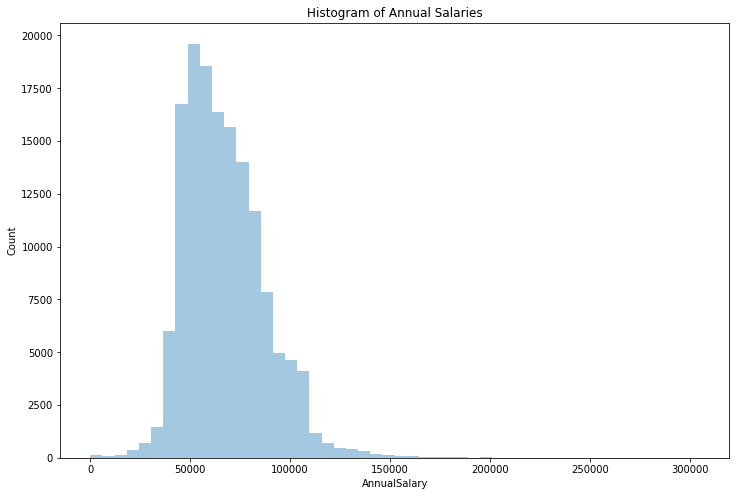

In [11]:
dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(data['AnnualSalary'], kde=False, ax=ax)
ax.set(ylabel = 'Count', title = 'Histogram of Annual Salaries')

With a basic idea of the distribution of the salaries, the natural next question is how do the salaries vary between job categories?

The **JobCategory** column has four unique values: Adminstrative/Supervisory, Classroom Teachers, Coordinate Services, and Others. These are further broken down in the **Position** column to specify each person's exact role.



In [12]:
data.groupby(['JobCategory','Position']).size()

JobCategory                   Position                      
Administrative / Supervisory  Chief School Administrator          712
                              LEA Administrator                   218
                              School Administrator               4564
                              Supervisor / Coordinator           1567
Classroom Teachers            Elementary Special Ed. Teacher     5776
                              Elementary Teacher                51164
                              Secondary Special Ed. Teacher      2772
                              Secondary Teacher                 49307
                              Ungraded Special Ed. Teacher       9101
                              Ungraded Teacher                    762
Coordinate Services           Guidance                           4347
                              Health / Welfare                   4484
                              Operations                         1311
                             

So starting with the higher level **JobCategory** column, how do salaries break down? Here a violin plot is used to simultaneously draw both the distribution and the exploratory statistics. 

[Text(0.5,1,'Distribution of Annual Salary by Job Category')]

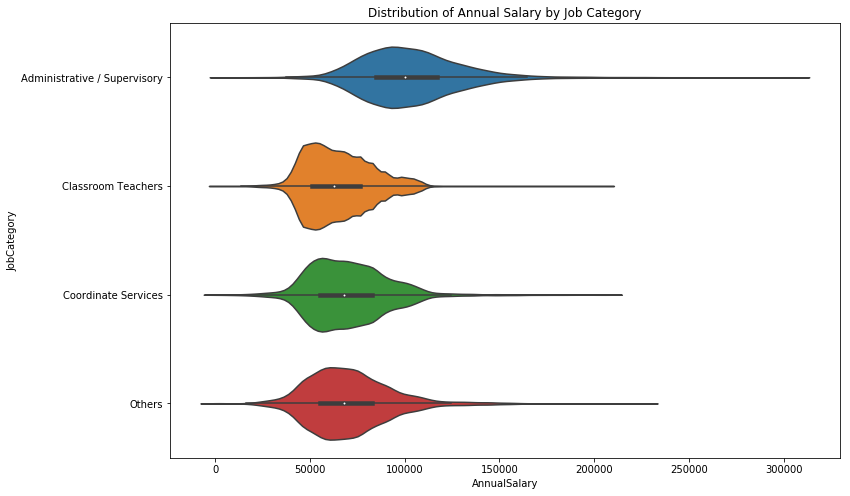

In [13]:
dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(x='AnnualSalary', y='JobCategory', data=data, ax=ax)
ax.set(title = 'Distribution of Annual Salary by Job Category')

There's a few things that stand out to me:

1. The same basic left skewed distribution shows up across all job categories, with a lot of low-end salaries being balanced out by long right tails.
2. Administrators are clearly paid a lot more. 
    * The median is clearly higher by \$20,000 to \$30,000
    * The upper range of salaries above \$220,000 are all administrative. 
    * Out of all the categories, the left skew is least pronounced and looks the most normally distributed with the median lining up with the histogram peak. 
3. Classroom teacher actually look like they're paid the least out of all the categories.
    * The median, 25th, and 75th quartile are each the lowest out of all the categories.
    * The left skew is not only the most pronounced for teachers, the distribution peaks at a lower salary than all other categories.
    * However, in terms of distributions classroom teachers and coordinate services are actually very closely distributed. 

There's also a final consideration to keep in mind: these plots have actually be re-scaled to all be the same size. The count plot below illustrates what the _size()_ call above showed: there are drastically more teachers than people in any of the other categories. The violin plots, unscaled, would be proportionally flat 

[Text(0,0.5,'Number of People'),
 Text(0.5,1,'Distribution of Work Force by Job Category')]

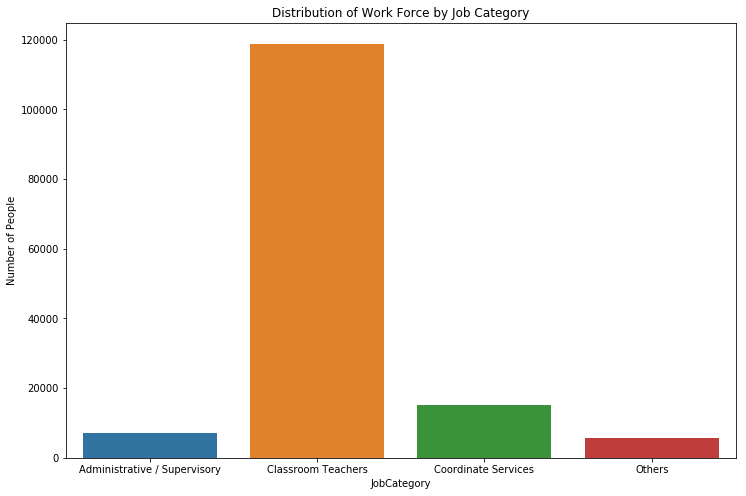

In [14]:
dims = (12, 8)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='JobCategory', data=data)
ax.set(title = 'Distribution of Work Force by Job Category', ylabel = 'Number of People')

### The Hunger Games: But Actually Salaries

One of the problems here is that there's too many other variables that haven't been considered and it's difficult to draw conclusive insights. So why start with school districts? The goal is to create groups that will be as uniform as possible within each group to reduce the effects of any extraneous variables. It's easier to imagine conditions are more similar for everyone in a school district than compared to all first year teachers across the state. That being said, this is just an intuited starting point, and it's entirely possible my hypothesis is false.

The goal is to essentially build a multi-index table with the two indices I'm interested in: **SchoolDistrict** and **JobCategory**, and aggregating various information across these variables. These would include:

* Counts of persons and their distribution to help determine district size
* Averages and distributions of Years in LEA, Years in Education, Annual Salary
* Totals of Annual Salary to help determine district 'wealth'


In [15]:
data['SchoolDistrict'].nunique()

769

In [16]:
district_category_data = data.groupby(['SchoolDistrict','JobCategory']).mean()

In [17]:
district_category_data['TotalSalary'] = data.groupby(['SchoolDistrict','JobCategory']).sum()['AnnualSalary']

In [18]:
district_category_data['TotalPersons'] = data.groupby(['SchoolDistrict','JobCategory']).count()['Name']

In [19]:
district_category_data.columns = ['AvgYearsInLEA','AvgYearsInEd','AvgAnnualSalary','SumSalaries','SumPersons']

In [20]:
district_category_data.head()

AvgYearsInLEA  \
SchoolDistrict        JobCategory                                   
-                     Administrative / Supervisory       2.038462   
                      Classroom Teachers                 1.900524   
                      Coordinate Services                1.500000   
                      Others                             1.846154   
21st Century Cyber CS Administrative / Supervisory       4.333333   

                                                    AvgYearsInEd  \
SchoolDistrict        JobCategory                                  
-                     Administrative / Supervisory     11.192308   
                      Classroom Teachers                4.188482   
                      Coordinate Services               5.583333   
                      Others                           11.230769   
21st Century Cyber CS Administrative / Supervisory     14.666667   

                                                    AvgAnnualSalary  \
SchoolDistrict        JobCategory                                     
-                     Administrative / Supervisory     80109.653846   
                      Classroom Teachers               45629.591623   
                      Coordinate Services              55764.583333   
                      Others                           41646.153846   
21st Century Cyber CS Administrative / Supervisory    104567.000000   

                                                    SumSalaries  SumPersons  
SchoolDistrict        JobCategory                                            
-                     Administrative / Supervisory      2082851          26  
                      Classroom Teachers                8715252         191  
                      Coordinate Services                669175          12  
                      Others                             541400          13  
21st Century Cyber CS Administrative / Supervisory       313701           3

In [21]:
district_data = district_category_data.unstack()

In [22]:
district_data['TotalAnnualSalary'] = district_data['AvgAnnualSalary'].sum(axis=1)
district_data['TotalPersons'] = district_data['SumPersons'].sum(axis=1)

In [23]:
district_data.head()

AvgYearsInLEA                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                             2.038462           1.900524   
21st Century Cyber CS                         4.333333           4.973684   
A W Beattie Career Center                    11.333333          12.034483   
ACT Academy Cyber CS                          1.000000           1.125000   
ARIN IU 28                                   11.875000          11.825000   

                                                          \
JobCategory               Coordinate Services     Others   
SchoolDistrict                                             
-                                    1.500000   1.846154   
21st Century Cyber CS                5.000000   6.000000   
A W Beattie Career Center            4.500000  11.500000   
ACT Academy Cyber CS                 1.000000        NaN   
ARIN IU 28                          13.222222  20.333333   

                                          AvgYearsInEd                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                            11.192308           4.188482   
21st Century Cyber CS                        14.666667           7.263158   
A W Beattie Career Center                    14.000000          13.793103   
ACT Academy Cyber CS                         11.000000           9.500000   
ARIN IU 28                                   15.375000          13.175000   

                                                          \
JobCategory               Coordinate Services     Others   
SchoolDistrict                                             
-                                    5.583333  11.230769   
21st Century Cyber CS                7.400000   9.666667   
A W Beattie Career Center           17.500000  12.333333   
ACT Academy Cyber CS                 2.000000        NaN   
ARIN IU 28                          15.555556  20.666667   

                                       AvgAnnualSalary                     \
JobCategory               Administrative / Supervisory Classroom Teachers   
SchoolDistrict                                                              
-                                         80109.653846       45629.591623   
21st Century Cyber CS                    104567.000000       58499.605263   
A W Beattie Career Center                 88516.666667       60988.655172   
ACT Academy Cyber CS                      89000.000000       45460.500000   
ARIN IU 28                                92491.000000       66702.575000   

                              ...                       SumSalaries  \
JobCategory                   ...      Administrative / Supervisory   
SchoolDistrict                ...                                     
-                             ...                         2082851.0   
21st Century Cyber CS         ...                          313701.0   
A W Beattie Career Center     ...                          265550.0   
ACT Academy Cyber CS          ...                          178000.0   
ARIN IU 28                    ...                          739928.0   

                                                                            \
JobCategory               Classroom Teachers Coordinate Services    Others   
SchoolDistrict                                                               
-                                  8715252.0            669175.0  541400.0   
21st Century Cyber CS              2222985.0            325919.0  268700.0   
A W Beattie Career Center          1768671.0            140756.0  378989.0   
ACT Academy Cyber CS                363684.0             45000.0       NaN   
ARIN IU 28                         2668103.0           1370081.0  257862.0   

                                  

In the end, I have two dataframes essentially storing the same information, stacked (or long) is easier for parsing by eye, and unstacked (or wide) is necessary for creating visualizations. 

Again, my primary goal here is to analyze differences in salary on a district-by-district basis.

The first step is a little involved: essentially I want to create a horizontal stacked barplot. This isn't directly supported using the _seaborn_ package; however a workaround is to simply sum the values wanted and then plot the new summed columns superimposed by the smaller column. Maybe this makes sense, the visualization helps. 

However, I also want to order the barplot, which adds some more complication. I can either re-order the dataframe before-hand, or provide a key to re-order the dataframe in the seaborn plot call. While I could accomplish the first step referring to existing variables, accomplishing the ordering is much more difficult. Luckily I can subset my dataframe as a new variable without copying the columns in memory. So at this point, I'm going to spin off a new dataframe specifically for achieving the visualizations I want. While I do this, I'll re-order the dataframe into the order I want for my first visualization.

In [24]:
salary_data = pd.DataFrame(data = {'sums': district_data[('AvgAnnualSalary','Administrative / Supervisory')]+district_data[('AvgAnnualSalary','Classroom Teachers')],
                                   'administrators': district_data[('AvgAnnualSalary','Administrative / Supervisory')],
                                   'teachers': district_data[('AvgAnnualSalary','Classroom Teachers')],
                                   'size': district_data[('TotalPersons')],
                                   'budget': district_data[('TotalAnnualSalary')]}
                        ).sort_values(by=['sums','teachers'],ascending=False)

In [25]:
salary_data.head()

,administrators,budget,size,sums,teachers
SchoolDistrict,,,,,
Ridley SD,147903.266667,455537.064111,444.0,232154.213047,84250.946381
Lower Merion SD,136593.638889,439765.289907,805.0,230954.498645,94360.859756
Central Montco Technical High School,135697.000000,393172.761905,29.0,230932.095238,95235.095238
New Hope-Solebury SD,144960.500000,422351.138622,159.0,230011.045455,85050.545455
Wissahickon SD,138564.058824,420750.587352,391.0,228630.263028,90066.204204


[Text(0.5,0,'Dollars ($)'),
 Text(0.5,1,'Average Annual Salary by Job Category')]

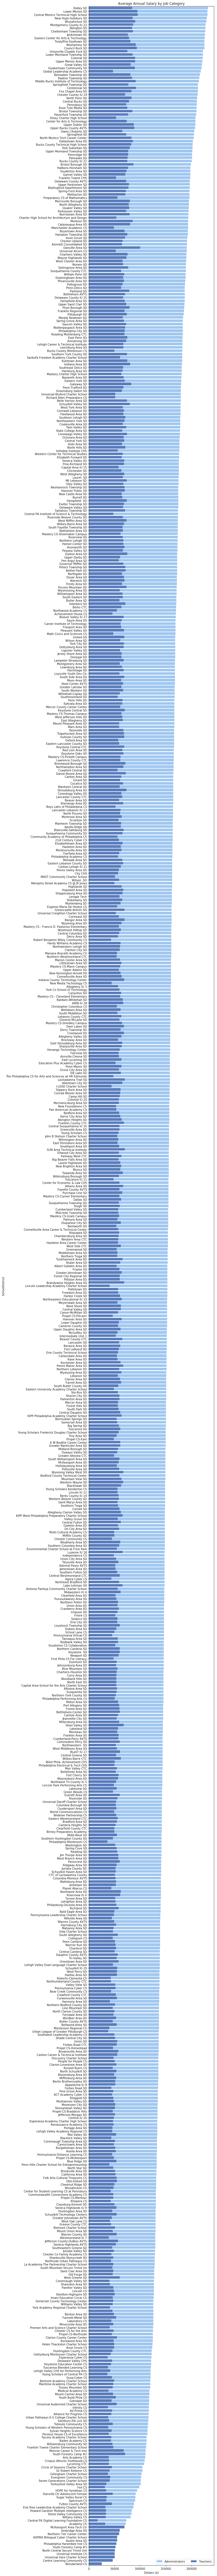

In [26]:
f, ax = plt.subplots(figsize=(8, 168))

# Plot the administrator pay
sns.set_color_codes("pastel")
sns.barplot(x=salary_data['sums'],
            y=salary_data.index,
            label="Administrators", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=salary_data['teachers'],
            y=salary_data.index,
            label="Teachers", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Dollars ($)",
       title="Average Annual Salary by Job Category")

The above graph is a good start, we can see within a school district how the pay ratio is distributed between teachers and administrators. For example, the first school Ridley SD  has the highest overall average annual salaries, but the pay favors administrators a little. However, further down, Global Leadership Academy CS pays their administrators much more on average. 

The problem is that it's difficult to compare school districts against each other. For this, the data needs to be scaled or normalized in some way. For this, I'll instead plot the ratio of the average annual salaries of administrators to teachers. 

In [27]:
row_order = pd.DataFrame(salary_data['administrators']/salary_data['sums']).sort_values(0,ascending=False).index

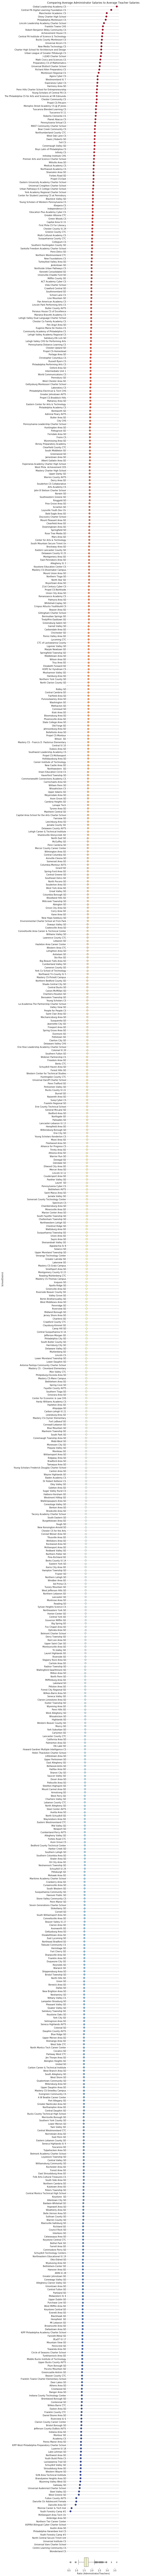

In [28]:

fig1 = plt.figure(1, figsize=(8, 168))
gridspec.GridSpec(169,1)

plt.subplot2grid((169,1), (0,0), rowspan=168, colspan=1)
ratio_plot = sns.stripplot(x=salary_data['administrators']/salary_data['teachers'],
              y=salary_data.index,
              palette="RdYlBu",
              linewidth = 0.5,
              size = 8,
              order = pd.DataFrame(salary_data['administrators']/salary_data['teachers']).sort_values(0,ascending=False).index
             )
ratio_plot.xaxis.grid(False)
ratio_plot.yaxis.grid(True)
ratio_plot.set_xticks([], minor=False)
ratio_plot.set(xlabel="", title="Comparing Average Administrator Salaries to Average Teacher Salaries")
sns.despine(left=True, bottom=True)

plt.subplot2grid((169,1), (168,0), rowspan=1, colspan=1)
ratio_box = sns.boxplot(x=salary_data['administrators']/salary_data['teachers'], palette="RdYlBu")
ratio_box.set_yticks([], minor=False)
ratio_box.set(xlabel="Ratio (Administrator/Teachers)")
sns.despine(left=True, bottom=True)

fig1.tight_layout()

fig1.savefig("F:\\GitHub\\TeacherSalary\\Visualizations\\2015_2016_PA_DistrictSalaryRatio.png")

The figure above plots the ratio of the average annual salaries for administrators to teachers, with a boxplot below to summarize the distribution. This allows for districts to be compared on a normalized scale. For example, from the previous plot Global Academy CS appeared fairly imbalanced; in fact, they pay their administrators the most compared to teachers than any other school district. They really are all about leadership! Because there are so many school districts, the boxplot helps flatten the graph. On average, most school districts seem to pay their administrators about 1.5 to 1.75 times as much as their teachers. The tail favors the higher end of course, with a fair number of outliers between 2.25 to 3. But some districts appear to pay their administrators less than their teachers.

I should also discuss the bottom of the plot; where twelve school districts have no data. Earlier I noted that there's no missing data: this is only true to the point that there are no N/A values, but it seems there is at least one missing area of data in that some districts have no administrators on the payroll. A little unusual in and of itself, but this also has implications on the other data: there's no guarantee that the administrators for each district are filling the same sorts of roles. One district may have a fully staffed administration with a Superintendent, Assistant Superintendents, etc.; while another district only lists a Supervisor. It's impossible to tell from just this visualization. As for why these school districts have no administrators, I do explore that a little more in my exploration notebook.

However, there's a final issue I want to address: How impactful are these salary imbalances? Now that there's a basis for comparing districts to each other, it's also important to account for the size of a district. 

[]

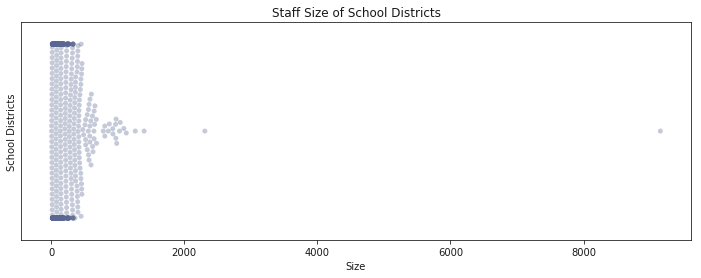

In [29]:
fig1, ax1 = plt.subplots(figsize = (12,4))
size_plot = sns.swarmplot(x=salary_data['size'], color='#5b6793', alpha=0.35)
size_plot.set(ylabel='School Districts', xlabel='Size', title='Staff Size of School Districts')
size_plot.set_yticklabels([])
size_plot.set_yticks([], minor=False)

Here there's a minor problem. The swarmplot above shows one school district outstrips all the others in terms of size by a massive margin. In fact, the swarmplot is actually so densely concentrated at the bottom as to be deceptive to the level of unbalance. This outlying school district is actually the city of Philadelphia. So far the data hasn't had these sorts of distant outliers. I've left them in to this point, however here I'll consider Philadelphia separately since it's so significantly different in terms of size. 

In [31]:
salary_data_no_phil = salary_data[-(salary_data['size'] > 4000)]

[Text(0,0.5,'School Districts'), Text(0.5,0,'Size')]

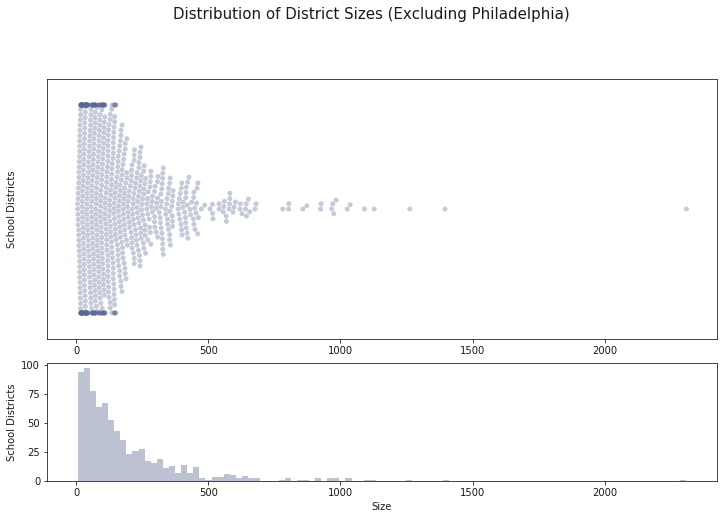

In [32]:
fig2, axes = plt.subplots(figsize = (12,10), sharex=True)
plt.suptitle("Distribution of District Sizes (Excluding Philadelphia)", fontsize=15)

plt.subplot2grid((4,3),(0,0), rowspan=2, colspan = 3)
figsub2a = sns.swarmplot(salary_data_no_phil['size'], color='#5b6793', alpha=0.35)
figsub2a.set(ylabel="School Districts")
figsub2a.yaxis.labelpad = 30
figsub2a.set_yticklabels([])
figsub2a.set_yticks([], minor=False)
figsub2a.xaxis.label.set_visible(False)

plt.subplot2grid((4,3),(2,0), rowspan=1, colspan = 3)
figsub2b = sns.distplot(salary_data_no_phil['size'], color='#5b6793', kde=False, bins=100)
figsub2b.set(xlabel="Size", ylabel="School Districts")

Without Philadelphia the distribution of sizes clears up a little bit. The swarmplot plots all data points, which is useful for visualizing the distribution of the larger school districts, but performs poorly with the hundreds of small school districts. The histogram on the other hand, has the opposite problem. Putting them together helps balance the other..

For reference, unsurprisingly the second largest district is Pittsburgh.

In [30]:
salary_data[salary_data['size'] > 2000]

,administrators,budget,size,sums,teachers
SchoolDistrict,,,,,
Pittsburgh SD,110791.898305,352185.039925,2309.0,184437.671800,73645.773495
Philadelphia City SD,113019.222997,330501.219660,9155.0,182755.854897,69736.631901


So now to compare salary ratios to district sizes:

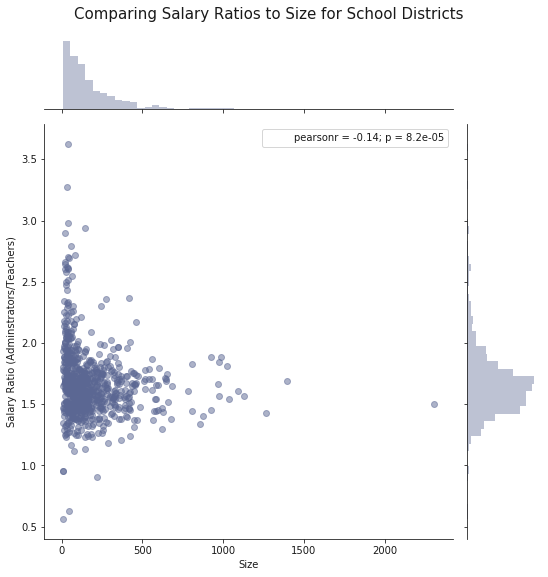

In [33]:
fig3 = sns.jointplot(x=salary_data_no_phil['size'],
              y=salary_data_no_phil['administrators']/salary_data_no_phil['teachers'], 
              color='#5b6793', alpha=0.5)
fig3.fig.set_figwidth(8)
fig3.fig.set_figheight(8)
plt.suptitle("Comparing Salary Ratios to Size for School Districts", fontsize=15, y =1.02)
fig3.set_axis_labels('Size','Salary Ratio (Adminstrators/Teachers)')

In [37]:
(salary_data_no_phil['administrators']/salary_data_no_phil['teachers']).mean()

1.672584830144329

In [38]:
(salary_data_no_phil['administrators']/salary_data_no_phil['teachers']).std()

0.2902317754726339

The main plot is a scatter plot of districts based on their size and the salary ratio. However, there are additional histograms on the x- and y-axes giving their respective distributions. Size was shown above, while the y-axis shows the salary ratios and their distributions, which approximates a normal distribution around 1.67 with a standard deviation of 0.29, roughly. 

From the plot it appears that as district size grows, the salary ratio regresses to the mean salary ratio. Smaller districts are where the major variations in salary ratio occur. So overall, the salary disparity between teachers and administrators is not unusually large:

* Salary ratios around and above 2.0 or higher are in school districts smaller than 500 people.
* Salary ratios around and above 2.5 or higher are in school districts smaller than 200 people.

However I also included another metric for district size: the budget. The first step is exclusionary: if district budget is strongly correlated with district size, then there should be little difference in the resulting analysis. If the correlation is weak, there might be grounds for further exploration.

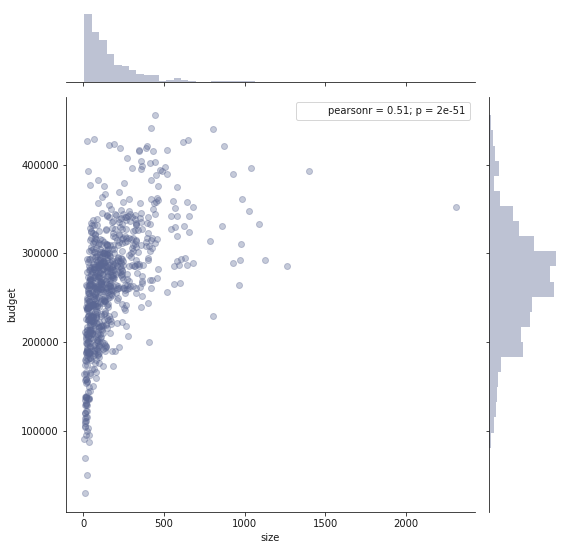

In [50]:
fig4 = sns.jointplot(x=salary_data_no_phil['size'],
              y=salary_data_no_phil['budget'], 
              color='#5b6793', alpha=0.35)
fig4.fig.set_figwidth(8)
fig4.fig.set_figheight(8)

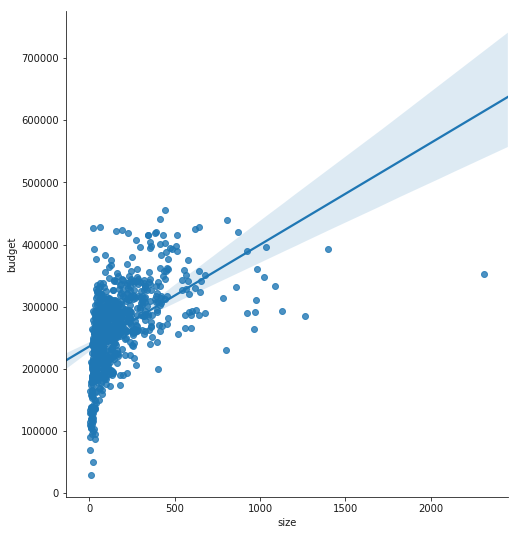

In [74]:
fig5 = sns.lmplot(x="size",y="budget", data = salary_data_no_phil)
fig5.fig.set_figwidth(8)
fig5.fig.set_figheight(8)

So the correlation coefficient is 0.51, with a p-value well below 0.05; but a look at the plot shows that the two don't really show a tight correlation pattern. It looks like a very tight, nearly vertical grouping with a wide scatter to the right. In the linear regression plot below, actually provides an interesting contrast where the linear regression line is very different.

However, there's actually a lot of scatter in both plots. This looks like a situation where the variables are widely but evenly scattered. 

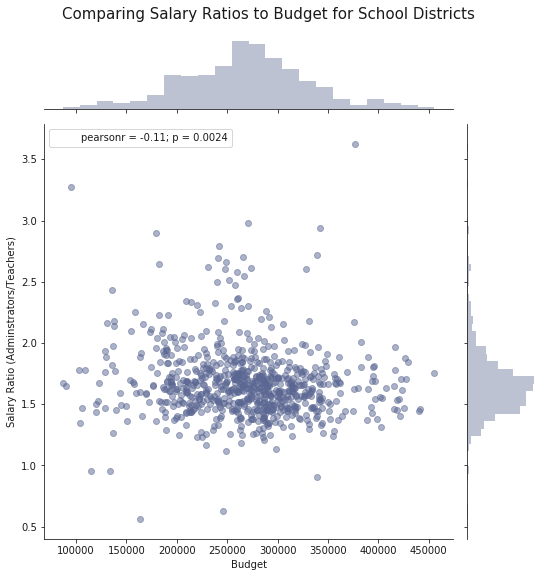

In [75]:
fig6 = sns.jointplot(x=salary_data['budget'],
              y=salary_data['administrators']/salary_data['teachers'], 
              color='#5b6793', alpha=0.5)
fig6.fig.set_figwidth(8)
fig6.fig.set_figheight(8)
plt.suptitle("Comparing Salary Ratios to Budget for School Districts", fontsize=15, y =1.02)
fig6.set_axis_labels('Budget','Salary Ratio (Adminstrators/Teachers)')

In [76]:
salary_data['budget'].mean()

265441.3656201442

In [77]:
salary_data['budget'].std()

65416.49826725662

So this plot is actually less useful. Essentially, both variables roughly follow normal distributions; and plotted against each other, there's a dense core in this plot, with fairly even scatter in all directions that's difficult to draw conclusions from. There's also a second sneaky note here: Philadelphia is actually not excluded here, making it just that much more interesting, but I'll get into that lter. With the plot of district size vs salary ratios, there were some takeaways in terms of district sizes. So why aren't there any similar takeaways here?

This carries over from the plot of size vs budget: the size of a school district doesn't correlate well with the budget of a school district. The two plots of salary ratio vs size and vs budget, respectively, should be strongly similar if size and budget were indeed strongly correlated; clearly they are not. Here, most schools of all budget sizes have average 1.65 ratio of average administrator to teacher salaries; but variations occur. And those variations do take on a hint of that linear regression line and the weak correlation in the two variables. Most of the variations have an increasing ratio discrepancy as budget increases. Essentially, quadrants 1 and 3 have outliers, 2 and 4 have fewer.

In conclusion:

* There are significantly more teachers than administrators.
* In general, annual salaries roughly follow a right-skewed normal distribution which is stronger the more people there are (i.e. it's heavily pronounced for teachers, weaker for administrators)
* The ratio of average annual salaries of administrators to teachers is also roughly normal distribution, with mean at 1.67 and a standard deviation of 0.3
* Most school districts are very small, with decreasing numbers of school districts of larger and larger sizes.
* Most school districts have an average total budget for salaries that is normally distributed with a mean of \$265,441 and a standard deviation of \$65,416.
* School district size isn't strongly correlated with school district budget.
* Salary ratios around and above 2.0 or higher are in school districts smaller than 500 people.
* Salary ratios around and above 2.5 or higher are in school districts smaller than 200 people.

I'll look into the other variables in further parts, as well as the outliers I've identified here. There's also my exploration notebook using R where I get into some of the rougher ground work for this notebook, with corresponding project notes.